In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Import necessary libraries.
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import numpy as np  # Importing numpy for numerical operations
import os  # Importing os for operating system dependent functionality
import PIL  # Importing PIL for image processing
import tensorflow as tf  # Importing TensorFlow deep learning library
import pathlib  # Importing pathlib for dealing with file paths
from tensorflow import keras  # Importing Keras API from TensorFlow
from tensorflow.keras import layers  # Importing layers module from Keras
from tensorflow.keras.models import Sequential  # Importing Sequential model from Keras


Creating Training Dataset

In [ ]:
# Check and display the number of images in train-dataset

# Define the directory containing the training images.
train_image_data_dir = "/content/drive/MyDrive/thesis/FracAtlas/train-img/train-img/train"

# Convert the directory path to a pathlib.Path object for easier manipulation.
train_image_data_dir = pathlib.Path(train_image_data_dir)

# Count the total number of images in the training dataset.
train_image_count = len(list(train_image_data_dir.glob('*/*.jpg')))

# Count the number of fractured images in the training dataset.
train_image_count_fractured = len(list(train_image_data_dir.glob('Fractured/*')))

# Count the number of non-fractured images in the training dataset.
train_image_count_non_fractured = len(list(train_image_data_dir.glob('Non_fractured/*')))

# Display the total number of images in the training dataset.
print("Total = " + str(train_image_count))

# Display the number of fractured images in the training dataset.
print("fractured = " + str(train_image_count_fractured))

# Display the number of non-fractured images in the training dataset.
print("non-fractured = " + str(train_image_count_non_fractured))


Total = 3267
fractured = 574
non-fractured = 2693


In [ ]:
from struct import unpack  # Importing unpack function from struct for unpacking binary data
from tqdm import tqdm  # Importing tqdm for displaying progress bars while iterating over images
import os  # Importing os module for operating system dependent functionality

# marker_mapping is used to map hexadecimal markers to their corresponding descriptions
'''The marker_mapping dictionary is used to map hexadecimal markers found in JPEG files to their corresponding descriptions.
In the JPEG file format, certain markers indicate specific segments or information within the file.
These markers are represented by two-byte values, typically starting with 0xff, followed by a specific code indicating the type of marker
These markers play a crucial role in the structure and interpretation of JPEG files.'''
''' The marker_mapping dictionary provides a convenient way to associate these hexadecimal
markers with their descriptive names, making it easier to understand and interpret the contents of a JPEG file during processing or analysis'''
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}

class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

# List to store corrupt images
bads = []

# This section checks every image and if any exception occurs then adds the file to the list of corrupt files
for img in tqdm(list(train_image_data_dir.glob('Non_fractured/*'))):
    image = os.path.join("/content/drive/MyDrive/thesis/FracAtlas/train-img/train-img/train", img)
    image = JPEG(image)
    try:
        image.decode()
    except:
        bads.append(img)

# Remove corrupt images
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/thesis/FracAtlas/train-img/train-img/train", name))
    print(name)

# Clear the list for reuse
bads = []

# This section checks every image in the Fractured directory and removes corrupt images
for img in tqdm(list(train_image_data_dir.glob('Fractured/*'))):
    image = os.path.join("/content/drive/MyDrive/thesis/FracAtlas/train-img/train-img/train", img)
    image = JPEG(image)
    try:
        image.decode()
    except:
        bads.append(img)

# Remove corrupt images from the Fractured directory
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/thesis/FracAtlas/train-img/train-img/train", name))
    print(name)


100%|██████████| 574/574 [00:13<00:00, 41.96it/s] 


Creating validation Dataset

In [ ]:
# Check and display the number of images in valid-dataset.

# Define the directory containing the validation images.
valid_image_data_dir = "/content/drive/MyDrive/thesis/FracAtlas/valid-img/valid-img/valid"

# Convert the directory path to a pathlib.Path object for easier manipulation.
valid_image_data_dir = pathlib.Path(valid_image_data_dir)

# Count the total number of images in the validation dataset.
valid_image_count = len(list(valid_image_data_dir.glob('*/*.jpg')))

# Count the number of fractured images in the validation dataset.
valid_image_count_fractured = len(list(valid_image_data_dir.glob('Fractured/*')))

# Count the number of non-fractured images in the validation dataset.
valid_image_count_non_fractured = len(list(valid_image_data_dir.glob('Non_fractured/*')))

# Display the total number of images in the validation dataset.
print("Total = " + str(valid_image_count))

# Display the number of fractured images in the validation dataset.
print("fractured = " + str(valid_image_count_fractured))

# Display the number of non-fractured images in the validation dataset.
print("non-fractured = " + str(valid_image_count_non_fractured))


Total = 469
fractured = 82
non-fractured = 387


In [ ]:
from struct import unpack  # Importing unpack function from struct for unpacking binary data
from tqdm import tqdm  # Importing tqdm for displaying progress bars while iterating over images
import os  # Importing os module for operating system dependent functionality

# marker_mapping is used to map hexadecimal markers to their corresponding descriptions
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}

class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while True:
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data) == 0:
                break

# Removing corrupt images from Non_fractured images
bads = []

# This section checks every image, and if any exception occurs, then the file is listed as corrupt
for img in tqdm(list(valid_image_data_dir.glob('Non_fractured/*'))):
    image = os.path.join("/content/drive/MyDrive/thesis/FracAtlas/valid-img/valid-img/valid", img)
    image = JPEG(image)
    try:
        image.decode()
    except:
        bads.append(img)

# Remove corrupt images
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/thesis/FracAtlas/valid-img/valid-img/valid", name))
    print(name)

# Removing corrupt images from Fractured images
bads = []

for img in tqdm(list(valid_image_data_dir.glob('Fractured/*'))):
    image = os.path.join("/content/drive/MyDrive/thesis/FracAtlas/valid-img/valid-img/valid", img)
    image = JPEG(image)
    try:
        image.decode()
    except:
        bads.append(img)

# Remove corrupt images from the Fractured directory
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/thesis/FracAtlas/valid-img/valid-img/valid", name))
    print(name)


100%|██████████| 82/82 [00:43<00:00,  1.90it/s]


Creating Testing Dataset

In [ ]:
# Check and display the number of images in test-dataset.
test_image_data_dir = "/content/drive/MyDrive/thesis/FracAtlas/test-img/test-img/test"
test_image_data_dir = pathlib.Path(test_image_data_dir)
test_image_count = len(list(test_image_data_dir.glob('*/*.jpg')))
test_image_count_fractured = len(list(test_image_data_dir.glob('Fractured/*')))
test_image_count_non_fractured = len(list(test_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(test_image_count))
print("fractured = "+str(test_image_count_fractured))
print("non-fractured = "+str(test_image_count_non_fractured))


Total = 357
fractured = 61
non-fractured = 296


In [ ]:
from struct import unpack #struct for unpacking binary data
from tqdm import tqdm #tqdm for iterating over images
import os

#marker_mapping is used to map hexadecimal markers to their corresponding descriptions
'''The marker_mapping dictionary is used to map hexadecimal markers found in JPEG files to their corresponding descriptions.
In the JPEG file format, certain markers indicate specific segments or information within the file.
These markers are represented by two-byte values, typically starting with 0xff, followed by a specific code indicating the type of marker
These markers play a crucial role in the structure and interpretation of JPEG files.'''
''' The marker_mapping dictionary provides a convenient way to associate these hexadecimal
markers with their descriptive names, making it easier to understand and interpret the contents of a JPEG file during processing or analysis'''
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

#this section checks every images and if any exception occurs then listed the file as corrupt file
for img in tqdm(list(test_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/thesis/FracAtlas/test-img/test-img/test",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)

#remove corrupt images
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/thesis/FracAtlas/test-img/test-img/test",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(test_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/thesis/FracAtlas/test-img/test-img/test",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/thesis/FracAtlas/test-img/test-img/test",name))
    print(name)

100%|██████████| 61/61 [00:32<00:00,  1.88it/s]


Defining Image Size

In [ ]:
# Define the basic parameter, e.g., Batch Size, Image Size.
batch_size = 32 #refers to the number of training examples utilize in one iteration
img_height = 224
img_width = 224

Training Dataset

In [ ]:
# Define to use 100% of the images for training.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_image_data_dir,  # Directory containing the training images
  #validation_split=0.2,  # Not splitting the dataset for validation
  #subset="training",  # Not specifying a subset for training
  seed=123,  # Seed for shuffling the dataset
  label_mode="categorical",  # Mode for encoding labels (categorical for one-hot encoding)
  image_size=(img_height, img_width),  # Desired image size for resizing
  crop_to_aspect_ratio=True,  # Whether to crop images to match the specified aspect ratio
  batch_size=batch_size  # Batch size for training
)


Found 3267 files belonging to 2 classes.


In [ ]:
# Display the name of classes.
class_names = train_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 224, 224, 3)
(30, 2)


Validation Dataset

In [ ]:
# Define to use 100% of the images for validation.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_image_data_dir,  # Directory containing the validation images
  #validation_split=0.2,  # Not splitting the dataset for validation
  #subset="validation",  # Not specifying a subset for validation
  seed=123,  # Seed for shuffling the dataset
  label_mode="categorical",  # Mode for encoding labels (categorical for one-hot encoding)
  image_size=(img_height, img_width),  # Desired image size for resizing
  crop_to_aspect_ratio=True,  # Whether to crop images to match the specified aspect ratio
  batch_size=batch_size  # Batch size for validation
)


Found 469 files belonging to 2 classes.


In [ ]:
# Display the name of classes.
class_names = val_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


In [ ]:
for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 224, 224, 3)
(30, 2)


Testing Dataset

In [ ]:
# Define to use 100% of the images for testing.
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_image_data_dir,  # Directory containing the test images
  #validation_split=0.2,  # Not splitting the dataset for validation
  #subset="validation",  # Not specifying a subset for validation
  seed=123,  # Seed for shuffling the dataset
  label_mode="categorical",  # Mode for encoding labels (categorical for one-hot encoding)
  image_size=(img_height, img_width),  # Desired image size for resizing
  crop_to_aspect_ratio=True,  # Whether to crop images to match the specified aspect ratio
  batch_size=batch_size  # Batch size for testing
)


Found 357 files belonging to 2 classes.


In [ ]:
# Display the name of classes.
class_names = test_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


In [ ]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 224, 224, 3)
(30, 2)


Configure the dataset for performance

In [ ]:
#optimization algorithm
AUTOTUNE = tf.data.AUTOTUNE
# AUTOTUNE is a special value that allows TensorFlow to dynamically tune the value at runtime based on available resources.

#tf.data.AUTOTUNE , which will prompt the tf.data runtime to tune the value dynamically at runtime.
#tf.data builds a performance model of the input pipeline and runs an optimization algorithm to find a good allocation of its CPU budget across all parameters specified as AUTOTUNE
# Cache, shuffle, and prefetch the training dataset.
'''Cache:
When you apply caching to a dataset, TensorFlow stores the elements of the dataset in memory after they are loaded from disk or generated.
This can significantly speed up the training process because it avoids re-reading and re-preprocessing the data from disk or recomputing it from scratch.
Caching is particularly useful when dealing with small to moderately sized datasets that can fit into memory.'''
'''Prefetch:
Prefetching allows TensorFlow to asynchronously fetch batches of data while the model is still training on the current batch.
When you prefetch data, TensorFlow creates a buffer of elements in memory ahead of time, so that they are ready and waiting for the model to consume them when needed.
This overlapping of data loading and model execution helps to minimize the idle time of the model, leading to better overall throughput and performance.
By prefetching data, the CPU and GPU can work more efficiently, as they are less likely to be waiting for the next batch of data to be ready.'''
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# Cache and prefetch the validation dataset.
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# Cache and prefetch the validation dataset.
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Importing Functions To Implement Model

In [ ]:
from __future__ import print_function  # Importing print function from future module for Python 2 and 3 compatibility
import keras  # Importing Keras deep learning library
from keras.datasets import cifar10  # Importing CIFAR-10 dataset from Keras datasets
from keras.preprocessing.image import ImageDataGenerator  # Importing ImageDataGenerator for data augmentation
from keras.models import Sequential  # Importing Sequential model from Keras
from keras.layers import Dense, Dropout, Activation, Flatten  # Importing various layers from Keras
from keras.layers import Conv2D, MaxPooling2D  # Importing Conv2D and MaxPooling2D layers from Keras


In [ ]:
from __future__ import absolute_import  # Importing absolute_import feature from future module
from __future__ import division  # Importing division feature from future module
from __future__ import print_function  # Importing print_function feature from future module

import gzip  # Importing gzip module for reading and writing gzip files
import os  # Importing os module for operating system dependent functionality

import numpy as np  # Importing NumPy library with alias np

from tensorflow.python.keras.utils.data_utils import get_file  # Importing get_file function from TensorFlow Keras utilities
from tensorflow.python.util.tf_export import keras_export  # Importing keras_export decorator from TensorFlow Keras utilities


In [ ]:
import tensorflow as tf  # Importing TensorFlow library

from tensorflow.keras.optimizers import Adam  # Importing Adam optimizer from Keras optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D  # Importing various 2D convolutional and pooling layers
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Activation  # Importing input, dropout, dense, flatten, and activation layers
from tensorflow.keras.layers import BatchNormalization, concatenate  # Importing BatchNormalization layer and concatenate function
from tensorflow.keras import regularizers, initializers  # Importing modules for regularization and weight initialization
from tensorflow.keras.models import Model  # Importing Model class for defining Keras models
from tensorflow.keras.utils import get_file  # Importing get_file function for downloading files


In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.2 MB/s eta 0:00:00


Defining Metrics

In [ ]:
precision_m = tf.keras.metrics.Precision()  # Creating an instance of the Precision metric from TensorFlow Keras metrics


In [ ]:
```python
import numpy as np  # Importing NumPy library with alias np
import tensorflow as tf  # Importing TensorFlow library
from keras import backend as K  # Importing Keras backend module with alias K

# Custom recall metric function
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))  # Calculating true positives
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))  # Calculating possible positives
    recall_keras = true_positives / (possible_positives + K.epsilon())  # Calculating recall
    return recall_keras

# Custom precision metric function
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))  # Calculating true positives
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))  # Calculating predicted positives
    precision_keras = true_positives / (predicted_positives + K.epsilon())  # Calculating precision
    return precision_keras

# Custom specificity metric function
def specificity(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))  # Calculating true negatives
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))  # Calculating false positives
    return tn / (tn + fp + K.epsilon())  # Calculating specificity

# Custom negative predictive value metric function
def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))  # Calculating true negatives
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))  # Calculating false negatives
    return tn / (tn + fn + K.epsilon())  # Calculating negative predictive value

# Custom F1-score metric function
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)  # Calculating precision
    r = recall(y_true, y_pred)  # Calculating recall
    return 2 * ((p * r) / (p + r + K.epsilon()))  # Calculating F1-score
```

Implementing Model

In [ ]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F

class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.size(0), -1)
class ChannelGate(nn.Module):
    def __init__(self, gate_channel, reduction_ratio=16, num_layers=1):
        super(ChannelGate, self).__init__()
        self.gate_activation = gate_activation
        self.gate_c = nn.Sequential()
        self.gate_c.add_module( 'flatten', Flatten() )
        gate_channels = [gate_channel]
        gate_channels += [gate_channel // reduction_ratio] * num_layers
        gate_channels += [gate_channel]
        for i in range( len(gate_channels) - 2 ):
            self.gate_c.add_module( 'gate_c_fc_%d'%i, nn.Linear(gate_channels[i], gate_channels[i+1]) )
            self.gate_c.add_module( 'gate_c_bn_%d'%(i+1), nn.BatchNorm1d(gate_channels[i+1]) )
            self.gate_c.add_module( 'gate_c_relu_%d'%(i+1), nn.ReLU() )
        self.gate_c.add_module( 'gate_c_fc_final', nn.Linear(gate_channels[-2], gate_channels[-1]) )
    def forward(self, in_tensor):
        avg_pool = F.avg_pool2d( in_tensor, in_tensor.size(2), stride=in_tensor.size(2) )
        return self.gate_c( avg_pool ).unsqueeze(2).unsqueeze(3).expand_as(in_tensor)

class SpatialGate(nn.Module):
    def __init__(self, gate_channel, reduction_ratio=16, dilation_conv_num=2, dilation_val=4):
        super(SpatialGate, self).__init__()
        self.gate_s = nn.Sequential()
        self.gate_s.add_module( 'gate_s_conv_reduce0', nn.Conv2d(gate_channel, gate_channel//reduction_ratio, kernel_size=1))
        self.gate_s.add_module( 'gate_s_bn_reduce0',	nn.BatchNorm2d(gate_channel//reduction_ratio) )
        self.gate_s.add_module( 'gate_s_relu_reduce0',nn.ReLU() )
        for i in range( dilation_conv_num ):
            self.gate_s.add_module( 'gate_s_conv_di_%d'%i, nn.Conv2d(gate_channel//reduction_ratio, gate_channel//reduction_ratio, kernel_size=3, \
						padding=dilation_val, dilation=dilation_val) )
            self.gate_s.add_module( 'gate_s_bn_di_%d'%i, nn.BatchNorm2d(gate_channel//reduction_ratio) )
            self.gate_s.add_module( 'gate_s_relu_di_%d'%i, nn.ReLU() )
        self.gate_s.add_module( 'gate_s_conv_final', nn.Conv2d(gate_channel//reduction_ratio, 1, kernel_size=1) )
    def forward(self, in_tensor):
        return self.gate_s( in_tensor ).expand_as(in_tensor)
class BAM(nn.Module):
    def __init__(self, gate_channel):
        super(BAM, self).__init__()
        self.channel_att = ChannelGate(gate_channel)
        self.spatial_att = SpatialGate(gate_channel)
    def forward(self,in_tensor):
        att = 1 + F.sigmoid( self.channel_att(in_tensor) * self.spatial_att(in_tensor) )
        return att * in_tensor

In [ ]:
import tensorflow as tf  # Import TensorFlow library

# Importing necessary layers and Sequential from Keras
from tensorflow.keras import layers, Sequential

# Definition of Channel Attention module
class ChannelAttention(layers.Layer):
    def __init__(self, channel, reduction=16, num_layers=3):  # Constructor method
        super(ChannelAttention, self).__init__()  # Call superclass constructor
        self.avg_pool = layers.GlobalAvgPool2D(keepdims=True)  # Global average pooling layer
        gate_channels = [channel]  # List to hold gate channel sizes
        gate_channels += [channel // reduction] * num_layers  # Append channel sizes after reduction
        gate_channels += [channel]  # Append original channel size

        self.ca = Sequential()  # Sequential container for channel attention layers
        for i in range(len(gate_channels) - 2):  # Loop over the layers
            self.ca.add(layers.Dense(gate_channels[i + 1]))  # Add dense layer
            self.ca.add(layers.BatchNormalization())  # Batch normalization layer
            self.ca.add(layers.Activation('relu'))  # ReLU activation
        self.ca.add(layers.Dense(gate_channels[-1]))  # Final dense layer

    def call(self, x):  # Call method to apply layer to input
        res = self.avg_pool(x)  # Global average pooling
        res = self.ca(res)  # Channel attention
        return res

# Definition of Spatial Attention module
class SpatialAttention(layers.Layer):
    def __init__(self, channel, reduction=16, num_layers=3, dia_val=2):  # Constructor method
        super(SpatialAttention, self).__init__()  # Call superclass constructor
        self.sa = Sequential()  # Sequential container for spatial attention layers
        self.sa.add(layers.Conv2D(filters=channel // reduction, kernel_size=1))  # 1x1 convolution
        self.sa.add(layers.BatchNormalization())  # Batch normalization
        self.sa.add(layers.Activation('relu'))  # ReLU activation
        for i in range(num_layers):  # Loop over the layers
            self.sa.add(
                layers.Conv2D(filters=channel // reduction, kernel_size=3, padding='same', dilation_rate=dia_val))  # 3x3 convolution with dilation
            self.sa.add(layers.BatchNormalization())  # Batch normalization
            self.sa.add(layers.Activation('relu'))  # ReLU activation
        self.sa.add(layers.Conv2D(1, kernel_size=1))  # 1x1 convolution to obtain final attention map

    def call(self, x):  # Call method to apply layer to input
        res = self.sa(x)  # Spatial attention
        return res

# Definition of BAM (Bottleneck Attention Module) Block
'''the BAMBlock integrates both channel-wise and spatial attention mechanisms to selectively emphasize
 informative features while suppressing irrelevant ones, thereby enhancing the representational power of the network'''
class BAMBlock(layers.Layer):
    def __init__(self, channel=512, reduction=16, dia_val=2):  # Constructor method
        super(BAMBlock, self).__init__()  # Call superclass constructor
        self.ca = ChannelAttention(channel=channel, reduction=reduction)  # Channel attention
        self.sa = SpatialAttention(channel=channel, reduction=reduction, dia_val=dia_val)  # Spatial attention
        self.sigmoid = tf.sigmoid  # Sigmoid function

    def call(self, x):  # Call method to apply layer to input
        sa_out = self.sa(x)  # Spatial attention output
        ca_out = self.ca(x)  # Channel attention output
        weight = self.sigmoid(sa_out + ca_out)  # Combine spatial and channel attentions with sigmoid
        out = (1 + weight) * x  # Multiply input by weighted attention and scale
        return out

input = tf.random.normal((50, 12, 12, 192))  # Example input tensor
bam = BAMBlock(channel=192, reduction=16, dia_val=2)  # Initialize BAMBlock instance
output = bam(input)  # Forward pass through BAMBlock
print(output.shape)  # Print shape of output tensor


(50, 12, 12, 192)


In [ ]:
import tensorflow.python.keras.engine.training

In [ ]:
import tensorflow.keras.layers

In [ ]:
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.8 MB/s eta 0:00:00


In [ ]:
# InceptionV3

import tensorflow as tf

from keras import backend
from keras_applications import imagenet_utils
from tensorflow.keras import layers, Model
from tensorflow.python.keras.utils.data_utils import get_file


# isort: off
from tensorflow.python.util.tf_export import keras_export

WEIGHTS_PATH = (
    "https://storage.googleapis.com/tensorflow/keras-applications/"
    "inception_v3/inception_v3_weights_tf_dim_ordering_tf_kernels.h5"
)

WEIGHTS_PATH_NO_TOP = (
    "https://storage.googleapis.com/tensorflow/keras-applications/"
    "inception_v3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
)


@keras_export(
    "keras.applications.inception_v3.InceptionV3",
    "keras.applications.InceptionV3",
)

def InceptionV3_att(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    att_type = "BAM",
    classifier_activation="softmax",
):
    """Instantiates the Inception v3 architecture.

    Reference:
    - [Rethinking the Inception Architecture for Computer Vision](
        http://arxiv.org/abs/1512.00567) (CVPR 2016)

    This function returns a Keras image classification model,
    optionally loaded with weights pre-trained on ImageNet.

    For image classification use cases, see
    [this page for detailed examples](
      https://keras.io/api/applications/#usage-examples-for-image-classification-models).

    For transfer learning use cases, make sure to read the
    [guide to transfer learning & fine-tuning](
      https://keras.io/guides/transfer_learning/).

    Note: each Keras Application expects a specific kind of input preprocessing.
    For `InceptionV3`, call
    `tf.keras.applications.inception_v3.preprocess_input` on your inputs before
    passing them to the model. `inception_v3.preprocess_input` will scale input
    pixels between -1 and 1.

    Args:
      include_top: Boolean, whether to include the fully-connected
        layer at the top, as the last layer of the network. Defaults to `True`.
      weights: One of `None` (random initialization),
        `imagenet` (pre-training on ImageNet),
        or the path to the weights file to be loaded. Defaults to `imagenet`.
      input_tensor: Optional Keras tensor (i.e. output of `layers.Input()`)
        to use as image input for the model. `input_tensor` is useful for
        sharing inputs between multiple different networks. Defaults to `None`.
      input_shape: Optional shape tuple, only to be specified
        if `include_top` is False (otherwise the input shape
        has to be `(299, 299, 3)` (with `channels_last` data format)
        or `(3, 299, 299)` (with `channels_first` data format).
        It should have exactly 3 inputs channels,
        and width and height should be no smaller than 75.
        E.g. `(150, 150, 3)` would be one valid value.
        `input_shape` will be ignored if the `input_tensor` is provided.
      pooling: Optional pooling mode for feature extraction
        when `include_top` is `False`.
        - `None` (default) means that the output of the model will be
            the 4D tensor output of the last convolutional block.
        - `avg` means that global average pooling
            will be applied to the output of the
            last convolutional block, and thus
            the output of the model will be a 2D tensor.
        - `max` means that global max pooling will be applied.
      classes: optional number of classes to classify images
        into, only to be specified if `include_top` is True, and
        if no `weights` argument is specified. Defaults to 1000.
      classifier_activation: A `str` or callable. The activation function to use
        on the "top" layer. Ignored unless `include_top=True`. Set
        `classifier_activation=None` to return the logits of the "top" layer.
        When loading pretrained weights, `classifier_activation` can only
        be `None` or `"softmax"`.

    Returns:
      A `keras.Model` instance.
    """

    if not (weights in {"imagenet", None} or tf.io.gfile.exists(weights)):
        raise ValueError(
            "The `weights` argument should be either "
            "`None` (random initialization), `imagenet` "
            "(pre-training on ImageNet), "
            "or the path to the weights file to be loaded; "
            f"Received: weights={weights}"
        )

    if weights == "imagenet" and include_top and classes != 1000:
        raise ValueError(
            'If using `weights` as `"imagenet"` with `include_top` '
            "as true, `classes` should be 1000; "
            f"Received classes={classes}"
        )

    # Determine proper input shape
    input_shape = imagenet_utils._obtain_input_shape(
        input_shape,
        default_size=299,
        min_size=75,
        data_format=backend.image_data_format(),
        require_flatten=include_top,
        weights=weights,
    )

    if input_tensor is None:
        img_input = layers.Input(shape=input_shape)
    else:
        if not backend.is_keras_tensor(input_tensor):
            img_input = layers.Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    if backend.image_data_format() == "channels_first":
        channel_axis = 1
    else:
        channel_axis = 3



    x = conv2d_bn(img_input, 32, 3, 3, strides=(2, 2), padding="valid")



    x = conv2d_bn(x, 32, 3, 3, padding="valid")
    x = conv2d_bn(x, 64, 3, 3)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv2d_bn(x, 80, 1, 1, padding="valid")
    x = conv2d_bn(x, 192, 3, 3, padding="valid")

    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)




    # mixed 0: 35 x 35 x 256
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)

    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = layers.AveragePooling2D(
        (3, 3), strides=(1, 1), padding="same"
    )(x)
    branch_pool = conv2d_bn(branch_pool, 32, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name="mixed0",
    )


    # mixed 1: 35 x 35 x 288
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = layers.AveragePooling2D(
        (3, 3), strides=(1, 1), padding="same"
    )(x)
    branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name="mixed1",
    )

    # mixed 2: 35 x 35 x 288
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = layers.AveragePooling2D(
        (3, 3), strides=(1, 1), padding="same"
    )(x)
    branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name="mixed2",
    )

    # mixed 3: 17 x 17 x 768
    branch3x3 = conv2d_bn(x, 384, 3, 3, strides=(2, 2), padding="valid")

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(
        branch3x3dbl, 96, 3, 3, strides=(2, 2), padding="valid"
    )

    branch_pool = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = layers.concatenate(
        [branch3x3, branch3x3dbl, branch_pool], axis=channel_axis, name="mixed3"
    )

    # mixed 4: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 128, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 128, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 128, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = layers.AveragePooling2D(
        (3, 3), strides=(1, 1), padding="same"
    )(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=channel_axis,
        name="mixed4",
    )

###### attention1
    att = BAMBlock(channel=768, reduction=16, dia_val=2)
    x = att(x)
######

    # mixed 5, 6: 17 x 17 x 768
    for i in range(2):
        branch1x1 = conv2d_bn(x, 192, 1, 1)

        branch7x7 = conv2d_bn(x, 160, 1, 1)
        branch7x7 = conv2d_bn(branch7x7, 160, 1, 7)
        branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

        branch7x7dbl = conv2d_bn(x, 160, 1, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 1, 7)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

        branch_pool = layers.AveragePooling2D(
            (3, 3), strides=(1, 1), padding="same"
        )(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = layers.concatenate(
            [branch1x1, branch7x7, branch7x7dbl, branch_pool],
            axis=channel_axis,
            name="mixed" + str(5 + i),
        )

    # mixed 7: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 192, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 192, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 192, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = layers.AveragePooling2D(
        (3, 3), strides=(1, 1), padding="same"
    )(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=channel_axis,
        name="mixed7",
    )

    # mixed 8: 8 x 8 x 1280
    branch3x3 = conv2d_bn(x, 192, 1, 1)
    branch3x3 = conv2d_bn(branch3x3, 320, 3, 3, strides=(2, 2), padding="valid")

    branch7x7x3 = conv2d_bn(x, 192, 1, 1)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 1, 7)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 7, 1)
    branch7x7x3 = conv2d_bn(
        branch7x7x3, 192, 3, 3, strides=(2, 2), padding="valid"
    )

    branch_pool = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = layers.concatenate(
        [branch3x3, branch7x7x3, branch_pool], axis=channel_axis, name="mixed8"
    )

    # mixed 9: 8 x 8 x 2048
    for i in range(2):
        branch1x1 = conv2d_bn(x, 320, 1, 1)

        branch3x3 = conv2d_bn(x, 384, 1, 1)
        branch3x3_1 = conv2d_bn(branch3x3, 384, 1, 3)
        branch3x3_2 = conv2d_bn(branch3x3, 384, 3, 1)
        branch3x3 = layers.concatenate(
            [branch3x3_1, branch3x3_2],
            axis=channel_axis,
            name="mixed9_" + str(i),
        )

        branch3x3dbl = conv2d_bn(x, 448, 1, 1)
        branch3x3dbl = conv2d_bn(branch3x3dbl, 384, 3, 3)
        branch3x3dbl_1 = conv2d_bn(branch3x3dbl, 384, 1, 3)
        branch3x3dbl_2 = conv2d_bn(branch3x3dbl, 384, 3, 1)
        branch3x3dbl = layers.concatenate(
            [branch3x3dbl_1, branch3x3dbl_2], axis=channel_axis
        )

        branch_pool = layers.AveragePooling2D(
            (3, 3), strides=(1, 1), padding="same"
        )(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = layers.concatenate(
            [branch1x1, branch3x3, branch3x3dbl, branch_pool],
            axis=channel_axis,
            name="mixed" + str(9 + i),
        )

    if include_top:
        # Classification block
        x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
        imagenet_utils.validate_activation(classifier_activation, weights)
        x = layers.Dense(
            classes, activation=classifier_activation, name="predictions"
        )(x)
    else:
        if pooling == "avg":
            x = layers.GlobalAveragePooling2D()(x)
        elif pooling == "max":
            x = layers.GlobalMaxPooling2D()(x)

###### attention2
    att = BAMBlock(channel=2048, reduction=16, dia_val=2)
    x = att(x)
######

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = layer_utils.get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name="inception_v3")

    # Load weights.
    if weights == "imagenet":
        if include_top:
            weights_path = get_file(
                "inception_v3_weights_tf_dim_ordering_tf_kernels.h5",
                WEIGHTS_PATH,
                cache_subdir="models",
                file_hash="9a0d58056eeedaa3f26cb7ebd46da564",
            )
        else:
            weights_path = get_file(
                "inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5",
                WEIGHTS_PATH_NO_TOP,
                cache_subdir="models",
                file_hash="bcbd6486424b2319ff4ef7d526e38f63",
            )
        model.load_weights(weights_path)
    elif weights is not None:
        model.load_weights(weights)

    return model

def conv2d_bn(
    x, filters, num_row, num_col, padding="same", strides=(1, 1), name=None
):
    """Utility function to apply conv + BN.

    Args:
      x: input tensor.
      filters: filters in `Conv2D`.
      num_row: height of the convolution kernel.
      num_col: width of the convolution kernel.
      padding: padding mode in `Conv2D`.
      strides: strides in `Conv2D`.
      name: name of the ops; will become `name + '_conv'`
        for the convolution and `name + '_bn'` for the
        batch norm layer.

    Returns:
      Output tensor after applying `Conv2D` and `BatchNormalization`.
    """
    if name is not None:
        bn_name = name + "_bn"
        conv_name = name + "_conv"
    else:
        bn_name = None
        conv_name = None
    if backend.image_data_format() == "channels_first":
        bn_axis = 1
    else:
        bn_axis = 3
    x = layers.Conv2D(
        filters,
        (num_row, num_col),
        strides=strides,
        padding=padding,
        use_bias=False,
        name=conv_name,
    )(x)
    x = layers.BatchNormalization(axis=bn_axis, scale=False, name=bn_name)(x)
    x = layers.Activation("relu", name=name)(x)
    return x


@keras_export("keras.applications.inception_v3.preprocess_input")
def preprocess_input(x, data_format=None):
    return imagenet_utils.preprocess_input(
        x, data_format=data_format, mode="tf"
    )


@keras_export("keras.applications.inception_v3.decode_predictions")
def decode_predictions(preds, top=5):
    return imagenet_utils.decode_predictions(preds, top=top)



In [ ]:
#model for weight=None

#from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Create InceptionV3 base model
base_model = InceptionV3_att(weights=None, include_top=False, input_shape=(224, 224, 3))

# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1000, activation='relu')(x) #hidden layer=1000
predictions = Dense(2, activation='softmax')(x) #ouput layer=2

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

#declaring learning rate and its changes
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100, #learning rate decay after 100 steps
    decay_rate=0.90, #learning rate decays 90%
    staircase=True)

# Compile the model (you can adjust the optimizer and loss function)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy', precision, recall, f1])

#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization_7 (Bat  (None, 111, 111, 32)         96        ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation_7 (Activation)   (None, 111, 111, 32)         0         ['batch_normalization_7[0]

In [ ]:
import keras

dot_img_file = '/model_1.png'
keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
# Start model training with Dropout using validation set
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
109/109 [==============================] - 124s 372ms/step - loss: 0.6989 - accuracy: 0.8075 - precision: 0.8076 - recall: 0.8076 - f1: 0.8076 - val_loss: 0.4880 - val_accuracy: 0.8252 - val_precision: 0.8255 - val_recall: 0.8255 - val_f1: 0.8255
Epoch 2/50
109/109 [==============================] - 27s 245ms/step - loss: 0.4773 - accuracy: 0.8225 - precision: 0.8226 - recall: 0.8226 - f1: 0.8226 - val_loss: 0.4649 - val_accuracy: 0.8252 - val_precision: 0.8255 - val_recall: 0.8255 - val_f1: 0.8255
Epoch 3/50
109/109 [==============================] - 28s 253ms/step - loss: 0.4477 - accuracy: 0.8252 - precision: 0.8253 - recall: 0.8253 - f1: 0.8253 - val_loss: 0.5520 - val_accuracy: 0.7484 - val_precision: 0.7493 - val_recall: 0.7493 - val_f1: 0.7493
Epoch 4/50
109/109 [==============================] - 27s 250ms/step - loss: 0.4324 - accuracy: 0.8274 - precision: 0.8274 - recall: 0.8274 - f1: 0.8274 - val_loss: 0.4518 - val_accuracy: 0.8230 - val_precision: 0.8235 - val_rec

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'f1', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_f1'])

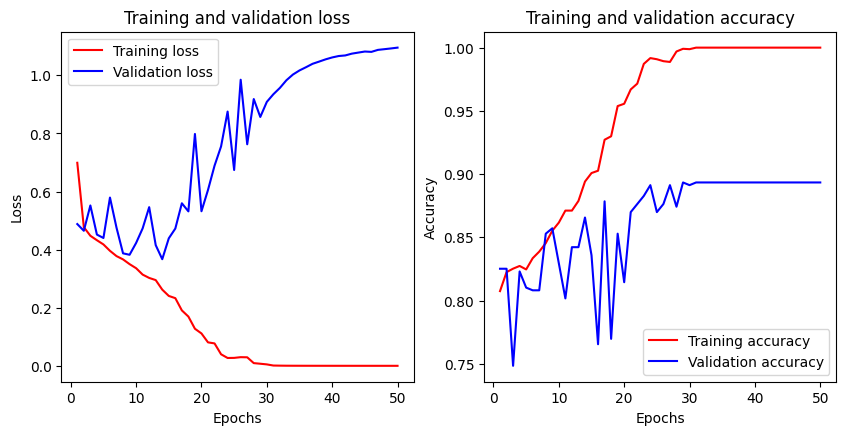

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib library for plotting

# Extracting data from the history dictionary
acc = history_dict['accuracy']  # Training accuracy
val_acc = history_dict['val_accuracy']  # Validation accuracy
loss = history_dict['loss']  # Training loss
val_loss = history_dict['val_loss']  # Validation loss

epochs = range(1, len(acc) + 1)  # Generating a range of epochs

# Creating a figure for plotting
plt.figure(figsize=(10, 10))

# Subplot for training and validation loss
ax1 = plt.subplot(221)  # Creating subplot
ax1.plot(epochs, loss, 'r', label='Training loss')  # Plotting training loss
ax1.plot(epochs, val_loss, 'b', label='Validation loss')  # Plotting validation loss
ax1.set_title('Training and validation loss')  # Setting title
ax1.set_xlabel('Epochs')  # Setting x-axis label
ax1.set_ylabel('Loss')  # Setting y-axis label
ax1.legend()  # Adding legend

# Subplot for training and validation accuracy
ax2 = plt.subplot(222)  # Creating subplot
ax2.plot(epochs, acc, 'r', label='Training accuracy')  # Plotting training accuracy
ax2.plot(epochs, val_acc, 'b', label='Validation accuracy')  # Plotting validation accuracy
ax2.set_title('Training and validation accuracy')  # Setting title
ax2.set_xlabel('Epochs')  # Setting x-axis label
ax2.set_ylabel('Accuracy')  # Setting y-axis label
ax2.legend()  # Adding legend

plt.show()  # Displaying the plot


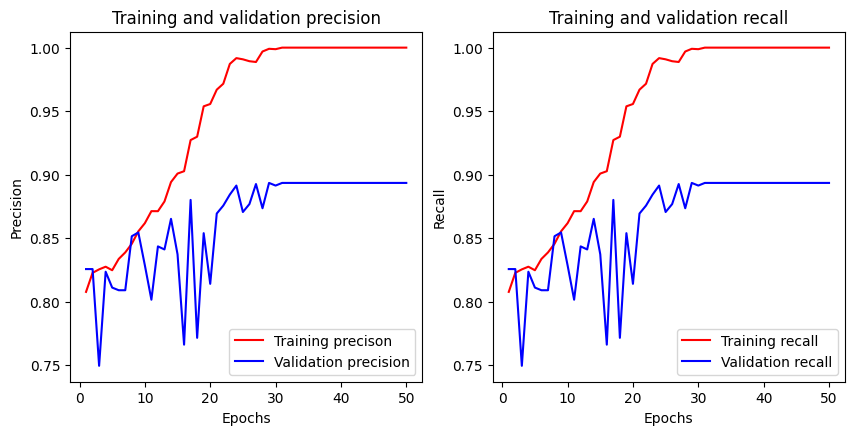

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib library for plotting

# Extracting data from the history dictionary
pre = history_dict['precision']  # Training precision
val_pre = history_dict['val_precision']  # Validation precision
rec = history_dict['recall']  # Training recall
val_rec = history_dict['val_recall']  # Validation recall

epochs = range(1, len(acc) + 1)  # Generating a range of epochs

# Creating a figure for plotting
plt.figure(figsize=(10, 10))

# Subplot for training and validation precision
ax1 = plt.subplot(221)  # Creating subplot
ax1.plot(epochs, pre, 'r', label='Training precision')  # Plotting training precision
ax1.plot(epochs, val_pre, 'b', label='Validation precision')  # Plotting validation precision
ax1.set_title('Training and validation precision')  # Setting title
ax1.set_xlabel('Epochs')  # Setting x-axis label
ax1.set_ylabel('Precision')  # Setting y-axis label
ax1.legend()  # Adding legend

# Subplot for training and validation recall
ax2 = plt.subplot(222)  # Creating subplot
ax2.plot(epochs, rec, 'r', label='Training recall')  # Plotting training recall
ax2.plot(epochs, val_rec, 'b', label='Validation recall')  # Plotting validation recall
ax2.set_title('Training and validation recall')  # Setting title
ax2.set_xlabel('Epochs')  # Setting x-axis label
ax2.set_ylabel('Recall')  # Setting y-axis label
ax2.legend()  # Adding legend

plt.show()  # Displaying the plot


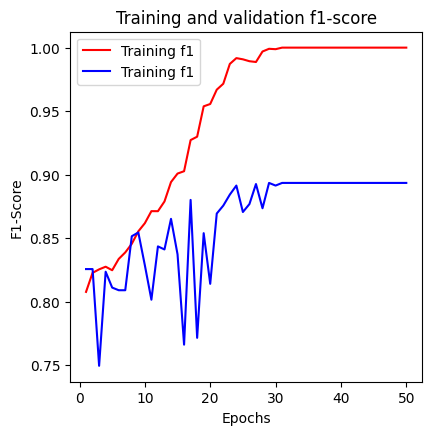

In [ ]:
import matplotlib.pyplot as plt
f1=history_dict['f1']
val_f1=history_dict['val_f1']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,f1,'r',label='Training f1')
ax1.plot(epochs,val_f1,'b',label='Training f1')
ax1.set_title('Training and validation f1-score')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('F1-Score')
ax1.legend()

In [ ]:
# FarcAtlas dataset

model.evaluate(test_ds)

12/12 [==============================] - 3s 107ms/step - loss: 1.0822 - accuracy: 0.9020 - precision: 0.9022 - recall: 0.9022 - f1: 0.9022


[1.082200527191162,
 0.9019607901573181,
 0.9021604657173157,
 0.9021604657173157,
 0.9021604657173157]